# Análise Exploratória de Dados
## Importando bibliotecas

In [1]:
from src.data import prepare
from src.data import process
from src.data import visualize

import pandas as pd
import numpy as np
import re
import string
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud
from PIL import Image

plt.style.use('seaborn-notebook')
%matplotlib inline

## Carregando os dados

In [2]:
true_path = "../data/raw/full_texts/true/"
fake_path = "../data/raw/full_texts/fake/"
output_path = "../data/interim/news.csv"

prepare.make_text_dataframe(true_path, fake_path, output_path)

## Importando dados pré-processados

In [3]:
news_df = pd.read_csv(output_path)
news_df.sample(10)

,text,label
6167,Joesley não foi envenenado! Internação às pres...,fake
5701,General que criticou liberação de vistos duran...,fake
4999,VEJA revolta internautas ao declarar que Papa ...,fake
4704,"General diz que Constituição foi ""abandidada"":...",fake
2186,MPF reforça pedido de condenação contra Bendin...,true
2313,"Dona Marisa fica sem fluxo cerebral, e família...",true
5119,Padilha será a sétima baixa no governo Temer. ...,fake
6688,"Sociólogo americano diz que ""ALVO"" de Trump nã...",fake
6958,Tá de sacanagem! Defesa de Lula (que é ateu de...,fake
4655,Teste nuclear da Coreia matou mais de 200 pess...,fake


In [4]:
news_df[news_df['text'].str.contains('discurso')]

,text,label
2,Em propaganda partidária veiculada anteontem ...,true
12,Funaro: Temer e Cunha confabulavam diariamente...,true
16,"Ex-Aerotrem e agora 'Bigodão', Fidélix diz que...",true
18,Temer diz sentir saudade do tempo em que fazia...,true
33,Professor proíbe aluna de assistir aula acompa...,true
...,...,...
7125,Lula faz discurso em velório de Marisa e chama...,fake
7144,Quem fala demais... Durante discurso na sede d...,fake
7151,"O desrespeito de Lula com o MP, com a PF e co...",fake
7159,"STF entra em recesso e Lula está nas mãos da ""...",fake


## Pré-Processamento Básico

### Removendo pontuação

In [5]:
punctuation = list(string.punctuation) # Obtendo os caracteres especiais como lista
del(punctuation[12]) # Excluindo da remoção o caractere especial "-"
punctuation = "".join(punctuation) # Transformando novamente em string
punctuation

'!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [6]:
news_df['text'] = news_df['text'].apply(lambda c: re.sub('[%s]' % re.escape(punctuation), '', c))
news_df.sample(10)

,text,label
2042,HAVANA – Depois de meio século de poder absol...,true
1203,O laudo de perícia nos arquivos do Drousys e ...,true
4004,Vazou a carta pessoal que Temer enviou para Di...,fake
2391,Ao abordar a recente bandeira publicitária qu...,true
1706,Investigações da 46a fase da Lava Jato apontam...,true
6953,Equipe de Dilma sumiu com registros de visitan...,fake
6360,Frente a frente Juiz Moro intima Lula a depor ...,fake
4302,Ministério Público pode dar um fim definitivo ...,fake
5980,Que coisa feia Vídeo mostra deputados aos tapa...,fake
2093,Grupos paralisam atividades e protestam contra...,true


In [7]:
news_df[news_df['text'].str.contains('discurso')]

,text,label
2,Em propaganda partidária veiculada anteontem ...,true
12,Funaro Temer e Cunha confabulavam diariamente ...,true
16,Ex-Aerotrem e agora Bigodão Fidélix diz que nã...,true
18,Temer diz sentir saudade do tempo em que fazia...,true
33,Professor proíbe aluna de assistir aula acompa...,true
...,...,...
7125,Lula faz discurso em velório de Marisa e chama...,fake
7144,Quem fala demais Durante discurso na sede do P...,fake
7151,O desrespeito de Lula com o MP com a PF e com...,fake
7159,STF entra em recesso e Lula está nas mãos da R...,fake


### Passando as palavras para minúsculo

In [8]:
news_df['text'] = news_df['text'].apply(lambda x: x.lower())
news_df.sample(10)

,text,label
2922,um dos personagens favoritos de minha pré-ado...,true
3063,trump põe um linha-dura contrário ao pacto com...,true
4499,correu porquê pf dá busca em hotel de brasília...,fake
7177,filha de guido mantega desmonta o mi-mi-mi não...,fake
3363,após autorizar a soltura da publicitária môni...,true
5353,cortella alertou uma nação não pode admitir um...,fake
4446,porque jô soares expulsou maurício mattar de s...,fake
5598,governo temer poderá ter a primeira baixa mini...,fake
5812,partido da rede o novo hospedeiro do vírus pe...,fake
3323,não sou líder de organização criminosa sou emp...,true


In [9]:
news_df[news_df['text'].str.contains('discurso')]

,text,label
2,em propaganda partidária veiculada anteontem ...,true
12,funaro temer e cunha confabulavam diariamente ...,true
16,ex-aerotrem e agora bigodão fidélix diz que nã...,true
18,temer diz sentir saudade do tempo em que fazia...,true
33,professor proíbe aluna de assistir aula acompa...,true
...,...,...
7125,lula faz discurso em velório de marisa e chama...,fake
7144,quem fala demais durante discurso na sede do p...,fake
7151,o desrespeito de lula com o mp com a pf e com...,fake
7159,stf entra em recesso e lula está nas mãos da r...,fake


## Analisando os dados obtidos

### Quantidade de dados

In [10]:
news_df['label'].value_counts()

true    3600
fake    3600
Name: label, dtype: int64

*O conjunto de dados do corpus se encontra balanceado. 
Pois há um número igual de amostras (textos) em ambas as classes: verdadeiros (true) e falsos (fake).*

### Comprimento

#### De todo o texto

- Qual o comprimento dos textos obtidos?
- O comprimento dos textos difere entre falsos e verdadeiros?

In [11]:
news_df['text_length'] = news_df['text'].str.len()

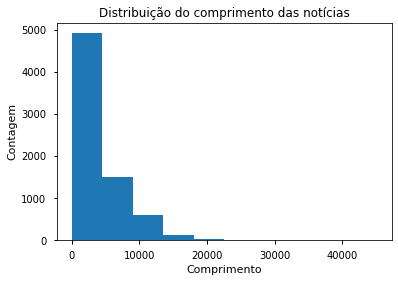

In [12]:
plt.hist(news_df.text_length)
plt.xlabel('Comprimento')
plt.ylabel('Contagem')
plt.title('Distribuição do comprimento das notícias')
plt.show()

In [13]:
news_df.text_length.describe()

count     7200.000000
mean      3797.509444
std       3963.118688
min         44.000000
25%        919.000000
50%       2128.000000
75%       5465.000000
max      45033.000000
Name: text_length, dtype: float64

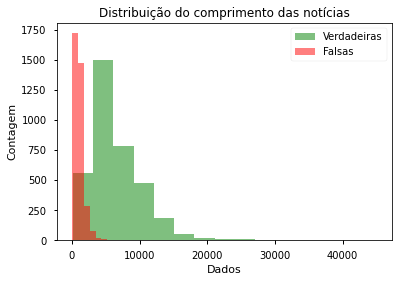

In [14]:
bins = 15
alpha = 0.5

plt.hist(news_df[news_df.label == 'true'].text_length,
         bins=bins,
         alpha=alpha,
         label='Verdadeiras',
         color='green')

plt.hist(news_df[news_df.label == 'fake'].text_length,
         bins=bins,
         alpha=alpha,
         label='Falsas',
         color='red')

plt.xlabel('Dados')
plt.ylabel('Contagem')
plt.title('Distribuição do comprimento das notícias')
plt.legend(loc='upper right')

plt.show()

*As notícias têm entre 46 e cerca de 46000 palavras, se distribuindo de maneira desigual de acordo com sua categoria. O comprimento das notícias verdadeiras tem tamanhos mais variados e mediana superior às notícias falsas, cujo comprimento se concentra numa faixa reduzida.* 

*Dentro desse conjunto de dados, notícias falsas tendem a ser mais curtas.*

#### Das palavras

- Há diferença no tamanho médio das palavras entre as diferentes categorias de notícias?

In [15]:
news_df['mean_word_len'] = (
    news_df['text']
    .str
    .split()
    .apply(lambda text : [len(word) for word in text])
    .map(lambda word: np.mean(word))
)

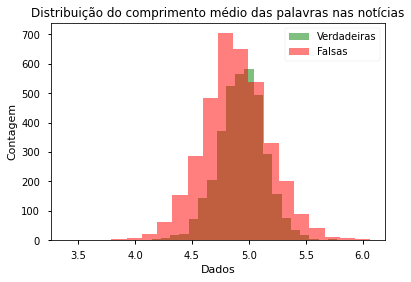

In [16]:
bins = 20
alpha = 0.5

plt.hist(news_df[news_df.label == 'true'].mean_word_len,
         bins=bins,
         alpha=alpha,
         label='Verdadeiras',
         color='green')

plt.hist(news_df[news_df.label == 'fake'].mean_word_len,
         bins=bins,
         alpha=alpha,
         label='Falsas',
         color='red')

plt.xlabel('Dados')
plt.ylabel('Contagem')
plt.title('Distribuição do comprimento médio das palavras nas notícias')
plt.legend(loc='upper right')

plt.show()

*Não parece haver diferença no comprimento médio das palavras utilizadas nas notícias, quaisquer que sejam as categorias.*

### Número de palavras

In [17]:
news_df['text_size'] = (
    news_df['text']
    .str
    .split()
    .str
    .len()
)

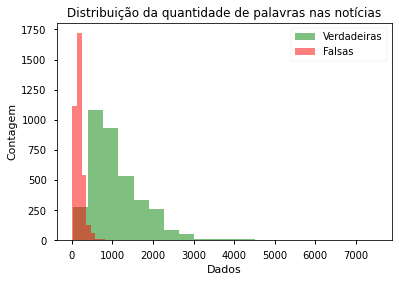

In [18]:
bins = 20
alpha = 0.5

plt.hist(news_df[news_df.label == 'true'].text_size,
         bins=bins,
         alpha=alpha,
         label='Verdadeiras',
         color='green')

plt.hist(news_df[news_df.label == 'fake'].text_size,
         bins=bins,
         alpha=alpha,
         label='Falsas',
         color='red')

plt.xlabel('Dados')
plt.ylabel('Contagem')
plt.title('Distribuição da quantidade de palavras nas notícias')
plt.legend(loc='upper right')

plt.show()

### Nuvens de palavras
- As palavras mais usadas nas notícias abordadas estão dentro dos mesmos campos semânticos?

In [19]:
nltk.download('stopwords')
stop = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /home/tayna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


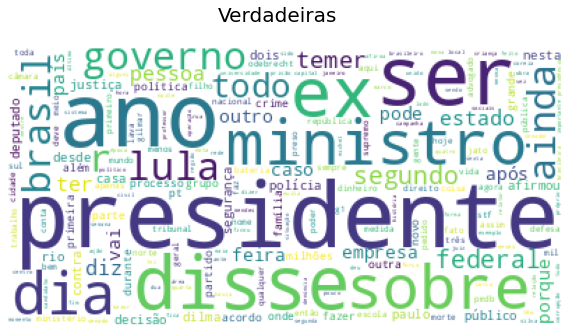

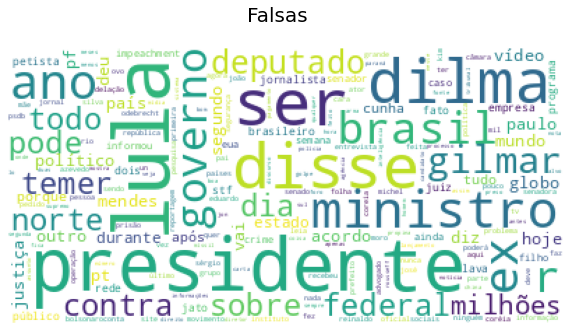

In [20]:
visualize.show_wordcloud(news_df[news_df.label == 'true'].text[0:100], 
               stop, title = 'Verdadeiras')

visualize.show_wordcloud(news_df[news_df.label == 'fake'].text[0:100], 
               stop, title = 'Falsas')

plt.show()

### N-gramas
- Em que contextos as palavras são usadas?

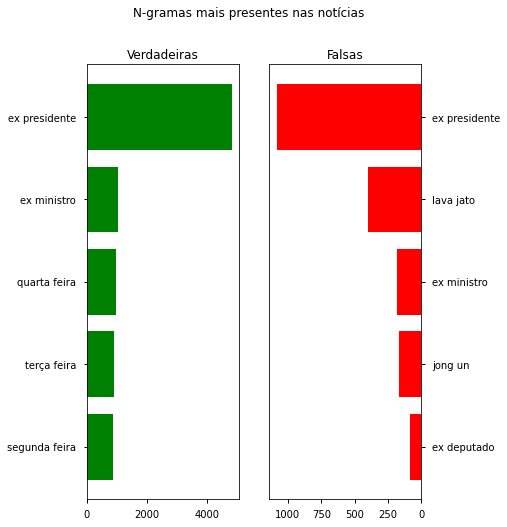

In [23]:
true_corpus = process.create_corpus(news_df[news_df.label == 'true'].text)
fake_corpus = process.create_corpus(news_df[news_df.label == 'fake'].text)

true_n_gram = process.get_top_ngram(corpus = true_corpus, n=2, top=40, stop_words=stop)
fake_n_gram = process.get_top_ngram(corpus = fake_corpus, n=2, top=40, stop_words=stop)

visualize.show_ngrams(true_n_gram, fake_n_gram)

Podemos observar que em ambas as categorias, se faz referência a "ex presidente" e a ocupantes anteriores de cargos ("ex ministro", "ex deputado", "ex diretor"). 

Nas notícias verdadeiras há uma *contaminação* de palavras relacionadas aos dias da semana. Há ainda referências a partidos (psdb, dem, pmdb), e a Coreia do norte em ambos os casos.

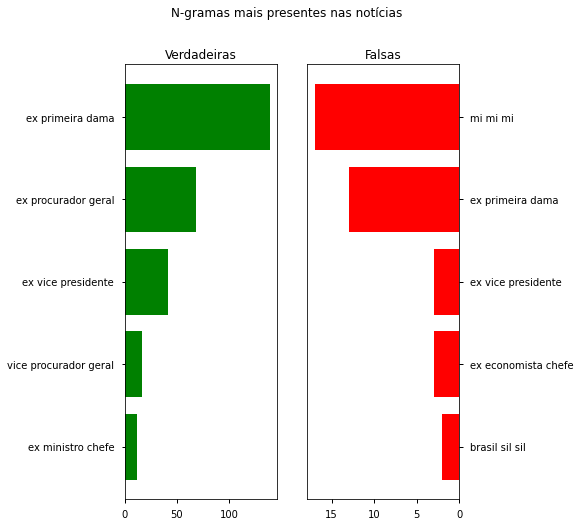

In [24]:
true_n_gram = process.get_top_ngram(corpus = true_corpus, n=3, top=5, stop_words=stop)
fake_n_gram = process.get_top_ngram(corpus = fake_corpus, n=3, top=5, stop_words=stop)

visualize.show_ngrams(true_n_gram, fake_n_gram)

A eliminação da pontuação foi suficiente para reduzir a frequência de trigramas contendo datas e endereços eletrônicos.

*Apagar depois, texto escrito pré-remoção da pontuação*

Com a visualização em trigramas fica mais fácil observar a contaminação nos textos. Observamos 

- datas, ex: "28 07 2016", "16 02 2017"
- endereços eletrônicos 
    - aparentemente relacionados, ex: "www institutolula org"
    - aparentemente não relacionados, ex: "www letras mus"

Uma eliminação de números e endereços eletrônicos (palavras com www, https, etc) poderá melhorar a qualidade dos dados.

